In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
def linearconv(nx):
    """Solve the linear convection equation
    
    Solves the equation d_t u + c d_x u = 0 where
    * the wavespeed c is set to 1
    * the domain is x \in [0,2]
    * 20 timesteps are taken with \Delta t = 0.025
    * the initial data is the hat function
    
    Produces a plot of the results
    
    Parameters
    ----------
    
    nx : interger
         number of internal grid points
    
    Returns 
    -------
    
    None : none
    """
    dx = 2/(nx-1)
    nt = 20
    dt = 0.025
    c = 1
    
    x = np.linspace(0,2,nx)
    
    u = np.ones(nx)
    lbound = np.where(x >= 0.5)
    ubound = np.where(x <= 1)
    u[np.intersect1d(lbound, ubound)]=2
    
    un = np.ones(nx)
    
    for n in range(nt):
        un = u.copy()
        u[1:] = un[1:] - c*dt/dx*(un[1:] - un[0:-1])
        u[0] = 1.0
    
    plt.plot(x, u, color='#006633', ls='--', lw=3)
    plt.ylim(0,2.5)

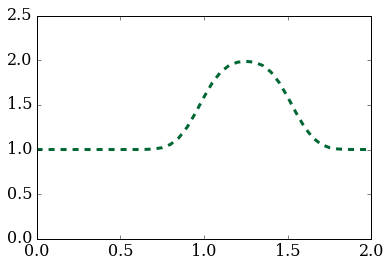

In [3]:
linearconv(41)

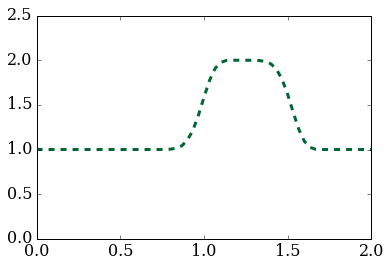

In [4]:
linearconv(61)

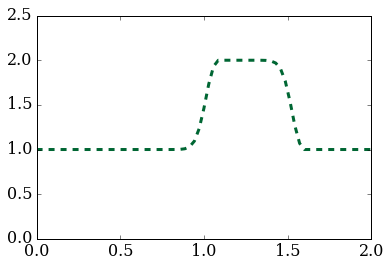

In [5]:
linearconv(71)

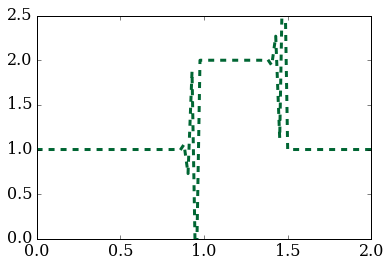

In [6]:
linearconv(85)

# Whats happening?
According to the lesson, over the time period dt, the wave travels a distance that is greater than dx and the solution becomes unstable. We need to impose a condition described by the CFL number to ensure that the value c*dt, is less that dx.

In [7]:
def linearconv(nx):
    """Solve the linear convection equation.
    
    Solves the equation d_t u + c d_x u = 0 where 
    * the wavespeed c is set to 1
    * the domain is x \in [0, 2]
    * 20 timesteps are taken, with \Delta t computed using the CFL 0.5
    * the initial data is the hat function
    
    Produces a plot of the results
    
    Parameters
    ----------
    
    nx : integer
        number of internal grid points
        
    Returns
    -------
    
    None : none
    """
    dx = 2/(nx-1)
    nt = 20    
    c = 1
    sigma = 1
    x = np.linspace(0,2,nx)
    
    dt = sigma*dx

    u = np.ones(nx) 
    lbound = np.where(x >= 0.5)
    ubound = np.where(x <= 1)
    u[np.intersect1d(lbound, ubound)]=2 

    un = np.ones(nx)

    for n in range(nt):  
        un = u.copy() 
        u[1:] = un[1:] -c*dt/dx*(un[1:] -un[0:-1]) 
        u[0] = 1.0
        
    plt.plot(x, u, color='#003366', ls='--', lw=3)
    plt.ylim(0,2.5);

In [ ]:
linearconv(int(5e8))

Seems to work, however in the lesson, it says that the condition for stability of the forward-time/backward-space condition is sigma < 1, although I have set sigma = 1 and it also seems to work. Is this a typo?

No, it isn't. If sigma = 1, the equation become